In [178]:
#Import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
color = sns.color_palette()
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings("ignore")

In [179]:
df = pd.read_csv("C:\\Users\\Suyash Tiwari\\Dropbox\\PC\\Downloads\\New folder\\Default.csv.csv") 

In [180]:
df

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879
...,...,...,...,...,...
9995,9996,No,No,711.555020,52992.378914
9996,9997,No,No,757.962918,19660.721768
9997,9998,No,No,845.411989,58636.156984
9998,9999,No,No,1569.009053,36669.112365


In [181]:
df = df[['Unnamed: 0','default','student','balance','income']]

In [182]:
df.columns = ['','default','student','balance','income']

In [183]:
df

,,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879
...,...,...,...,...,...
9995,9996,No,No,711.555020,52992.378914
9996,9997,No,No,757.962918,19660.721768
9997,9998,No,No,845.411989,58636.156984
9998,9999,No,No,1569.009053,36669.112365


In [184]:
df.shape

(10000, 5)

In [185]:
df.describe()

,,balance,income
count,10000.00000,10000.000000,10000.000000
mean,5000.50000,835.374886,33516.981876
std,2886.89568,483.714985,13336.639563
min,1.00000,0.000000,771.967729
25%,2500.75000,481.731105,21340.462903
50%,5000.50000,823.636973,34552.644802
75%,7500.25000,1166.308386,43807.729272
max,10000.00000,2654.322576,73554.233495


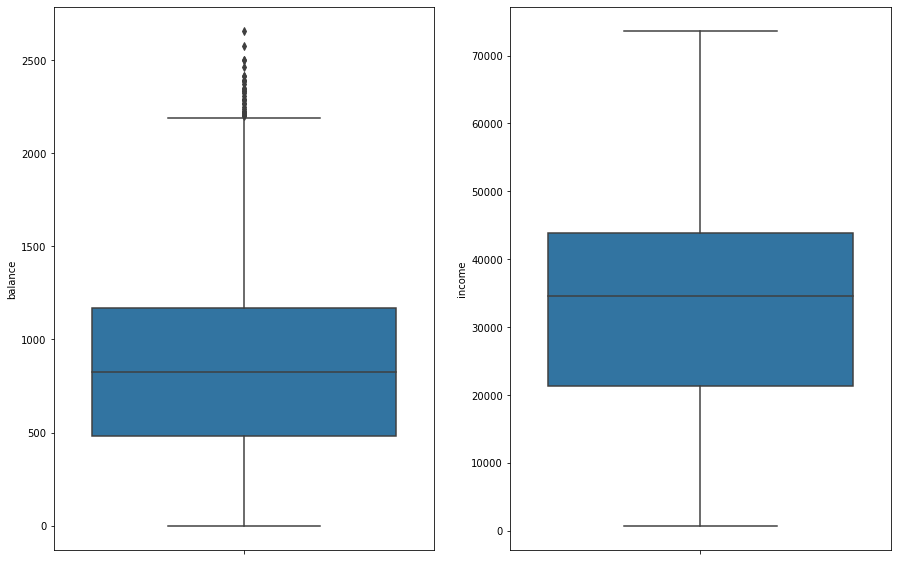

In [186]:
plt.figure(figsize = (15,10))
plt.subplot(1,2,1)
sns.boxplot(y = df['balance'])

plt.subplot(1,2,2)
sns.boxplot(y = df['income'])
plt.show()

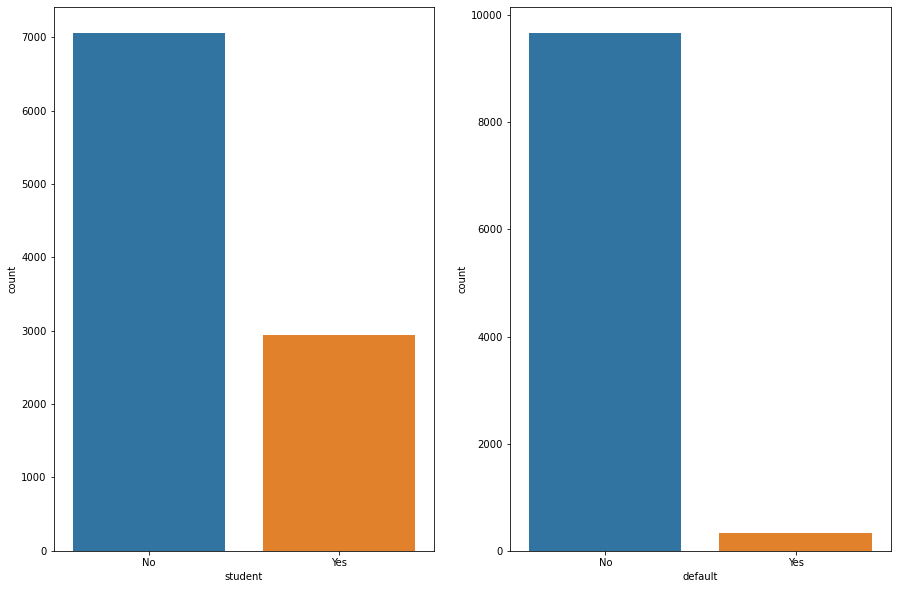

In [187]:
plt.figure(figsize = (15,10))
plt.subplot(1,2,1)
sns.countplot(df['student'])

plt.subplot(1,2,2)
sns.countplot(df['default'])
plt.show()

In [188]:
df['student'].value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

In [189]:
df['default'].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [190]:
df['student'].value_counts(normalize = True)

No     0.7056
Yes    0.2944
Name: student, dtype: float64

In [191]:
df['default'].value_counts(normalize = True)

No     0.9667
Yes    0.0333
Name: default, dtype: float64

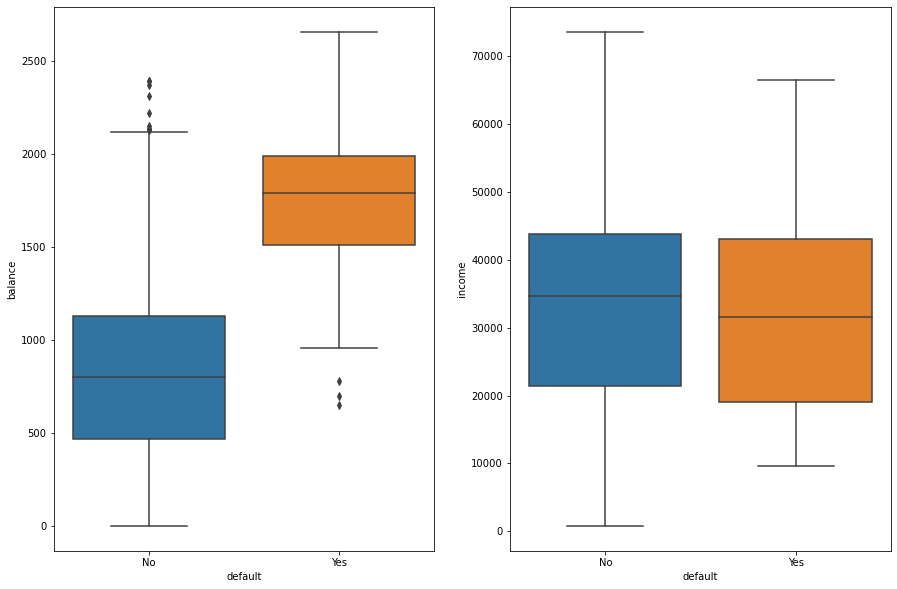

In [192]:
plt.figure(figsize = (15,10))
plt.subplot(1,2,1)
sns.boxplot(df['default'], df['balance'])

plt.subplot(1,2,2)
sns.boxplot(df['default'], df['income'])
plt.show()

In [193]:
pd.crosstab(df['student'], df['default'], normalize='index').round(2)

default,No,Yes
student,,
No,0.97,0.03
Yes,0.96,0.04


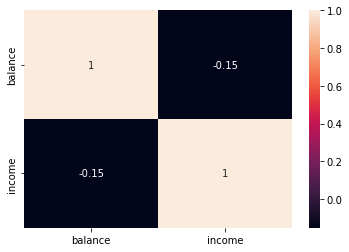

In [194]:
sns.heatmap(df[['balance','income']].corr(), annot=True)
plt.show()

In [195]:
df.isnull().sum()

           0
default    0
student    0
balance    0
income     0
dtype: int64

In [196]:
Q1, Q3 = df['balance'].quantile([0.25, 0.75])
IQR = Q3-Q1
LL = Q1 - 1.5*(IQR)
UL = Q3 + 1.5*(IQR)

In [197]:
UL

2193.1743086078154

In [198]:
LL

-545.1348170774601

In [199]:
dfi= df[df['balance'] > UL]

In [200]:
dfi

,,default,student,balance,income
173,174,Yes,Yes,2205.799521,14271.492253
1136,1137,Yes,No,2499.016750,51504.293960
1160,1161,Yes,Yes,2502.684931,14947.519752
1359,1360,Yes,No,2220.966201,40725.096207
1502,1503,Yes,Yes,2332.878254,11770.234124
1609,1610,Yes,Yes,2269.946966,18021.105948
2096,2097,Yes,Yes,2261.848162,20030.165119
2140,2141,No,Yes,2308.893236,19110.266412
2929,2930,Yes,Yes,2387.314867,28296.914718
3162,3163,Yes,Yes,2415.316994,17429.503375


In [201]:
dfi['default'].count()

31

In [202]:
dfi['default'].value_counts(normalize=True)

Yes    0.83871
No     0.16129
Name: default, dtype: float64

In [203]:
dfi['default'].value_counts()

Yes    26
No      5
Name: default, dtype: int64

In [204]:
df['balance'] = np.where(df['balance'] > UL, UL, df['balance'])

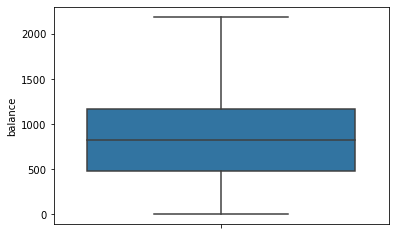

In [205]:
sns.boxplot(y = df['balance'])
plt.show()

In [206]:
#df = pd.get_dummies(df, drop_first=True)

In [207]:
#df

In [208]:
df = pd.read_csv("C:\\Users\\Suyash Tiwari\\Dropbox\\PC\\Downloads\\New folder\\Default.csv.csv")

In [209]:
df

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879
...,...,...,...,...,...
9995,9996,No,No,711.555020,52992.378914
9996,9997,No,No,757.962918,19660.721768
9997,9998,No,No,845.411989,58636.156984
9998,9999,No,No,1569.009053,36669.112365


In [210]:
a = df.drop('Unnamed: 0', axis=1)

In [211]:
a.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [212]:
a = pd.get_dummies(a, drop_first=True)

In [213]:
a.head()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,0,1
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0


In [214]:
a.columns = ['balance', 'income', 'default', 'student']

In [215]:
from sklearn.model_selection import train_test_split

In [216]:
x = a.drop('default', axis = 1)
y = a['default']

In [217]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 21, stratify = y)

In [218]:
print(x_train.shape)
print(x_test.shape)

(7000, 3)
(3000, 3)


In [219]:
print(y_train.value_counts(normalize=True).round(2))
print(' ')
print(y_test.value_counts(normalize=True).round(2))

0    0.97
1    0.03
Name: default, dtype: float64
 
0    0.97
1    0.03
Name: default, dtype: float64


In [220]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=33, sampling_strategy = 0.75)
x_res, y_res = sm.fit_resample(x_train, y_train)

In [221]:
from sklearn.linear_model import LogisticRegression

In [222]:
lr = LogisticRegression()

In [223]:
lr.fit(x_res, y_res)

LogisticRegression()

In [224]:
y_pred = lr.predict(x_test)

In [225]:
from sklearn.metrics import confusion_matrix, classification_report

In [226]:
confusion_matrix(y_test, y_pred)

array([[2589,  311],
       [  25,   75]], dtype=int64)

In [228]:
(2589+75)/(2589+75+311+25)

0.888